### Analysis

In [ ]:
# results obtained with the test set

In [20]:
import os
import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [10]:
METRICS_DIR = "/home/marcos/Escritorio/AI-prod/ML-Prod-Example/outputs/metrics/"

### helper funtions

In [14]:
# Function to extract timestamp from filename
def extract_timestamp(filename):
    # Filename format: experiment_baseline_<exp>_<YYYYMMDD_HHMMSS>.json
    timestamp_str = filename.rstrip(".json").split("_")[-2] + "_" + filename.rstrip(".json").split("_")[-1]
    # Parse as datetime
    return datetime.strptime(timestamp_str, "%Y%m%d_%H%M%S")


# get sorted files
def get_sorted_files(metrics_dir):
    # List all JSON files for the experiment
    json_files = [f for f in os.listdir(metrics_dir) if f.startswith("experiment_baseline") and f.endswith(".json")]

    # order
    json_files_sorted = sorted(json_files, key=extract_timestamp)
    
    # return
    return json_files_sorted


"""
json_files_sorted is sorted by the save timestamp, so the last element is the most recent experiment.

You can also pick any specific experiment by index, e.g., json_files_sorted[0] for the oldest.
"""

'\njson_files_sorted is sorted by the save timestamp, so the last element is the most recent experiment.\n\nYou can also pick any specific experiment by index, e.g., json_files_sorted[0] for the oldest.\n'

In [26]:
def print_metrics(metrics):
    # ---Display evaluation metrics in vertical DataFrame ---
    eval_results = metrics["evaluation_results"]
    metric_names = ["Loss", "Binary Accuracy", "Precision", "Recall"] 
    df_metrics = pd.DataFrame.from_dict({name: value for name, value in zip(metric_names, eval_results)}, 
                                        orient="index", columns=["Value"])
    print(df_metrics)


def plot_confussion_matrix(metrics):
    # Extract confusion matrix
    conf_matrix = np.array(metrics["confusion_matrix"])

    # --- Plot confusion matrix ---
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


def plot_roc_curve(metrics):
    # Extract ROC info
    fpr = np.array(metrics["fpr"])
    tpr = np.array(metrics["tpr"])
    roc_auc = metrics["roc_auc"]

    # --- Plot ROC curve ---
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr,  lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0,1], [0,1], color='gray', lw=1, linestyle='--')  # random guess line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

In [12]:
json_files_sorted = get_sorted_files(METRICS_DIR)
json_files_sorted

['experiment_baseline_standardize_20250829_165106_20250829_165133.json',
 'experiment_baseline_standardize_20250829_165106_20250829_170814.json']

here, we see the metrics for our best expermint order by time

### Metrics for an expermient

-> let'see the metrics for the last experminet (most recent)

In [17]:
# Pick the last one (most recent)
latest_file = json_files_sorted[-1]
latest_path = os.path.join(metrics_dir, latest_file)

# Load the JSON
with open(latest_path, "r") as f:
    metrics = json.load(f)

print(f"Loaded metrics from: {latest_file}")

print_metrics(metrics)

Loaded metrics from: experiment_baseline_standardize_20250829_165106_20250829_170814.json
                    Value
Loss             0.051419
Binary Accuracy  0.991228
Precision        1.000000
Recall           0.976190


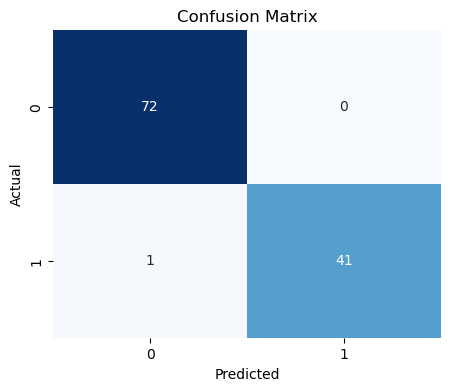

In [24]:
plot_confussion_matrix(metrics)

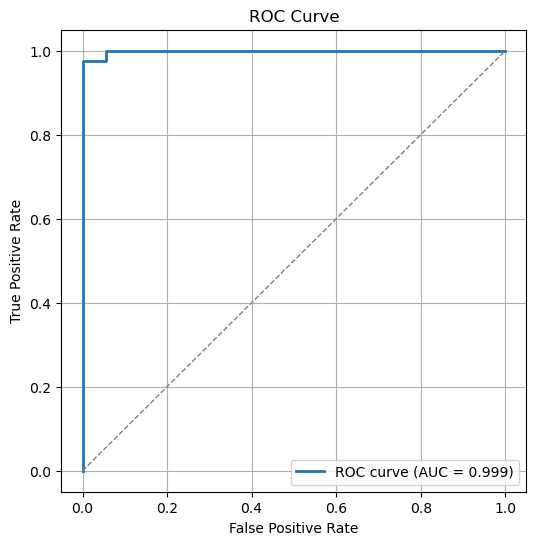

In [27]:
plot_roc_curve(metrics)

This is an almost perfect classifier!!!! (Again, our problem is too simple)

## Conclusions